In [2]:
# Import libraries
'''
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
'''

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

coulmns_should_be_integer_type_of_data = ["tmax", "tmin", "tavg", "dewpoint", "wetbulb", "heat", "cool"]
coulmns_should_be_float_type_of_data = ["snowfall", "preciptotal", "stnpressure", "sealevel", "depart",\
                                        "resultspeed", "resultdir", "avgspeed"]

import pickle
import costum_functions as cf

slack_url = pickle.load(open("send_url.pickle", "rb"))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_train_with_weather = pd.read_csv("df_train_with_weather_201806251508.csv")

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [5]:
df_train = cf.changeDataType(df_train_with_weather, coulmns_should_be_integer_type_of_data, coulmns_should_be_float_type_of_data)
cf.sendSlackDm(slack_url, "done")

In [7]:
cf.saveDataFrameToCsv(df_train, "df_train_changed_type")

In [6]:
test.tail()

,date,store_nbr,item_nbr
526912,2014-10-26,45,107
526913,2014-10-26,45,108
526914,2014-10-26,45,109
526915,2014-10-26,45,110
526916,2014-10-26,45,111


In [6]:
cf.divideIntoNumericAndCategoricalVariables(df_train)

Numerical Features Qty : 19 

Numerical Features :  ['store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed'] 


Categorical Features Qty : 4 

Categorical Features : ['date', 'sunrise', 'sunset', 'codesum']


(['store_nbr',
  'item_nbr',
  'units',
  'station_nbr',
  'tmax',
  'tmin',
  'tavg',
  'depart',
  'dewpoint',
  'wetbulb',
  'heat',
  'cool',
  'snowfall',
  'preciptotal',
  'stnpressure',
  'sealevel',
  'resultspeed',
  'resultdir',
  'avgspeed'],
 ['date', 'sunrise', 'sunset', 'codesum'])

In [2]:
cf.isThereNoneData(df_train_with_weather)

,Column,Missing Data,NaN Data,Trace Data
0,date,0,0,0
1,store_nbr,0,0,0
2,item_nbr,0,0,0
3,units,0,0,0
4,station_nbr,0,0,0
5,tmax,111444,0,0
6,tmin,111333,0,0
7,tavg,187701,0,0
8,depart,3070038,0,0
9,dewpoint,91020,0,0


In [42]:
df_weather.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
3,4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8


In [80]:
df_train_with_station_nbr[len(df_train_with_station_nbr) - 5:]["store_nbr"].values[0]

nan

In [87]:
df_train_with_station_nbr["date"] = df_train_with_station_nbr["date"].apply(cf.dateToNumeric)

In [95]:
len(df_train_with_station_nbr[np.isnan(df_train_with_station_nbr["store_nbr"])])

2150

In [121]:
nan_dates = df_train_with_station_nbr[np.isnan(df_train_with_station_nbr["store_nbr"])]

In [129]:
nan_dates = nan_dates.reset_index(drop=True)

In [131]:
nan_dates_li = nan_dates["date"].unique()

In [ ]:
for _ in len(nan_dates):
    

In [99]:
df_train_with_station_nbr[np.isnan(df_train_with_station_nbr["store_nbr"])]["date"].unique()

array([20121225, 20130401, 20130402, 20130403, 20130404, 20130405,
       20130406, 20130407, 20130408, 20130409, 20130410, 20130411,
       20130412, 20130413, 20130414, 20130415, 20130416, 20130417,
       20130418, 20130419, 20130420, 20130421, 20130426, 20130427,
       20130428, 20130429, 20130430, 20130501, 20130502, 20130503,
       20130504, 20130505, 20130506, 20130507, 20130508, 20130509,
       20130510, 20130511, 20130512, 20130513, 20130514, 20130515,
       20130516, 20130517, 20130518, 20130519, 20130520, 20130521,
       20130522, 20130523, 20130524, 20130525, 20130526, 20130527,
       20130528, 20130529, 20130530, 20130531, 20130601, 20130602,
       20130603, 20130604, 20130605, 20130606, 20130607, 20130608,
       20130609, 20130610, 20130611, 20130612, 20130613, 20130614,
       20130615, 20130616, 20130617, 20130618, 20130619, 20130620,
       20130621, 20130622, 20130623, 20130624, 20130625, 20130626,
       20130627, 20130628, 20130629, 20130630, 20130701, 20130

In [111]:
df_train_with_station_nbr[:-2150][np.isnan(df_train_with_station_nbr["store_nbr"])]

,date,store_nbr,item_nbr,units,station_nbr,tmax_x,tmin_x,tavg_x,depart_x,dewpoint_x,...,sunrise_y,sunset_y,codesum_y,snowfall_y,preciptotal_y,stnpressure_y,sealevel_y,resultspeed_y,resultdir_y,avgspeed_y


In [113]:
c = df_train_with_station_nbr[:-2150].groupby(by = "store_nbr").size()
np.array(c)

array([103119,  97125,  99456, 106560,  98568,  97125, 102786, 102120,
       105117,  98568,  99678, 101121, 102786, 105672, 112221,  95127,
       104229, 105117,  97458,  99456, 101454,  99678, 105117, 106560,
       112221, 105117,  99678,  99456, 101454,  96348, 105117, 112221,
       101454, 105117,  94461, 107004, 112221,  97125, 109113, 112221,
        98568,  97125, 101121,  98568, 105672])

In [101]:
df_train_with_station_nbr[np.isnan(df_train_with_station_nbr["store_nbr"])].groupby(by = "station_nbr").size()

station_nbr
1     106
2     178
3     121
4     115
5       1
6     109
7     139
8      52
9      75
10    137
11    124
12    147
13     24
14    160
15    157
16     83
17     88
18     71
19    167
20     96
dtype: int64

In [60]:
df_train_with_station_nbr.groupby(by = "station_nbr").size()

station_nbr
1     103225
2      95305
3     304483
4     102235
5      94462
6     205681
7     298507
8     109165
9     213195
10    299171
11    202366
12    394419
13    561129
14    388660
15     97615
16    211427
17    630790
18    107075
19     96515
20    104325
dtype: int64

In [58]:
len(df_train_with_station_nbr)

4619750

In [134]:
df_train_with_station_nbr = df_train_with_station_nbr.merge(df_weather, on=["date", "station_nbr"], how="inner")

In [151]:
cf.saveDataFrameToCsv(df_train_with_station_nbr, "df_train_with_weather")

In [150]:
cf.isThereNoneData(df_train_with_station_nbr)

,Column,Missing Data,NaN Data,Trace Data
0,date,0,0,0
1,store_nbr,0,0,0
2,item_nbr,0,0,0
3,units,0,0,0
4,station_nbr,0,0,0
5,tmax,111444,0,0
6,tmin,111333,0,0
7,tavg,187701,0,0
8,depart,3070038,0,0
9,dewpoint,91020,0,0


In [135]:
df_train_with_station_nbr.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
4617595,2014-10-31,39,107,0,8,78,55,67,M,M,...,-,-,RA,M,T,29.82,M,M,M,5.1
4617596,2014-10-31,39,108,0,8,78,55,67,M,M,...,-,-,RA,M,T,29.82,M,M,M,5.1
4617597,2014-10-31,39,109,0,8,78,55,67,M,M,...,-,-,RA,M,T,29.82,M,M,M,5.1
4617598,2014-10-31,39,110,0,8,78,55,67,M,M,...,-,-,RA,M,T,29.82,M,M,M,5.1
4617599,2014-10-31,39,111,2,8,78,55,67,M,M,...,-,-,RA,M,T,29.82,M,M,M,5.1


In [ ]:
df_train.tail()

In [ ]:
len(df_train_with_station_nbr)

In [3]:
df_key_reset = df_key.set_index("store_nbr")

In [4]:
store_nbr_li = [d[0] for d in df_key_reset.get_values()]

In [6]:
store_nbr_li

[1,
 14,
 7,
 9,
 12,
 14,
 6,
 4,
 17,
 12,
 10,
 11,
 6,
 16,
 13,
 2,
 20,
 17,
 15,
 7,
 3,
 10,
 17,
 9,
 13,
 17,
 10,
 7,
 3,
 19,
 17,
 13,
 3,
 17,
 5,
 18,
 13,
 14,
 8,
 13,
 12,
 14,
 11,
 12,
 16]

In [ ]:
df_train.loc[0]["store_nbr"]

In [ ]:
# def addStationNbrColumnToDataFrame(df):
#     li = []
#     for i in range(len(df)):
#         index = df.loc[i]["store_nbr"]
#         li.append(store_nbr_li[index - 1])
#     df_train["station_nbr"] = li

In [ ]:
cf.saveDataFrameToCsv(df_train, "df_train_with_station_nbr")

## Weather data

- Column : 전문용어
    - station_nbr : 기성청 번호
    - date : 날짜
- Temp : 화씨(Fahrenheit)
    - tmax : 최고 온도
    - tmin : 최저 온도
    - tavg : 평균 온도
    - depart : Departure from normal
    - dewpoint : 평균 이슬점
    - wetbulb : 평균 습구?
- Degree Days : Base 65 F
    - Heat : Heating (Season begins with July)
    - Cool : Cooling (Season begins with January)
    - sunrise : Sunrise (Calculated, not observed)
    - sunset : Sunset (Calculated, not observed)
- Significant Weather Types : 날씨 현상
    - codesum : 날씨현상, NO SIGN은 보통인 날을 의미한다.
- Snow/Ice : 인치
    - snowfall : 1/10인치, M = Missing Data, T = Trace
    - preciptotal : 비나, 녹은 눈 인치, M = Missing Data, T = Trace
- Pressure : 인치당 핵토그램(HG)?
    - stnpressure : AVERAGE STATION PRESSURE
    - sealevel : AVERAGE SEA LEVEL PRESSURE
- Wind : SPEED IN MILES PER HOUR, DIRECTION TO TENS OF DEGREES
    - resultspeed : Resultant Wind Speed
    - resultdir : Resultant Wind Direction
    - avgspeed : Average Speed
    
##### _**℃＝(℉－32)/1.8**_

In [ ]:
df = df_train.copy()
df['log1p'] = np.log(df['units'] + 1)

g = df.groupby(["store_nbr", "item_nbr"])['log1p'].mean()

In [ ]:
# date 포맷을 2014-01-01 object타입에서 20140101 타입으로 전환
df_weather["date"] = df_weather["date"].apply(cf.dateToNumeric)
df_train["date"] = df_train["date"].apply(cf.dateToNumeric)

# Weather 데이터 컬럼별 Missing Data 수량

In [132]:
cf.isThereNoneData(nan_dates)

,Column,Missing Data,Trace Data
0,date,0,0
1,store_nbr,0,0
2,item_nbr,0,0
3,units,0,0
4,station_nbr,0,0
5,tmax_x,0,0
6,tmin_x,0,0
7,tavg_x,0,0
8,depart_x,0,0
9,dewpoint_x,0,0


In [ ]:
cf.isThereNoneData(df_weather)

In [3]:
df_weather.groupby(by="station_nbr").size()

station_nbr
1     1035
2     1035
3     1035
4     1035
5      852
6     1035
7     1035
8     1035
9     1035
10    1035
11    1035
12    1035
13    1035
14    1035
15    1035
16    1035
17    1035
18    1035
19    1035
20    1035
dtype: int64

In [35]:
df_train.groupby(by="store_nbr").size()

store_nbr
1     103119
2      97125
3      99456
4     106560
5      98568
6      97125
7     102786
8     102120
9     105117
10     98568
11     99678
12    101121
13    102786
14    105672
15    112221
16     95127
17    104229
18    105117
19     97458
20     99456
21    101454
22     99678
23    105117
24    106560
25    112221
26    105117
27     99678
28     99456
29    101454
30     96348
31    105117
32    112221
33    101454
34    105117
35     94461
36    107004
37    112221
38     97125
39    109113
40    112221
41     98568
42     97125
43    101121
44     98568
45    105672
dtype: int64

In [ ]:
numerical_features, categorical_features = cf.divideIntoNumericAndCategoricalVariables(df_weather)

In [ ]:
df_weather.tail()

In [ ]:
check_depart = df_weather[df_weather["depart"] != "M"]

In [ ]:
check_depart["depart"].astype(int).describe()

- 총 2012-01-01 부터 2014-10-31까지 1035일간의 자료이지만 5번 기상청의 경우에는 852일간의 기록밖에 없다.

In [7]:
df_key = df_key.sort_values(by = ['station_nbr']).reset_index(drop=True)
df_key = df_key.reindex_axis(["station_nbr", "store_nbr"], axis = 1)

In [8]:
df_classifyStoresByStation = cf.classifyStoresByStation(df_key)

In [9]:
df_classifyStoresByStation

,station_nbr,store_nbr
0,1,1
1,2,16
2,3,"29, 21, 33"
3,4,8
4,5,35
5,6,"13, 7"
6,7,"3, 28, 20"
7,8,39
8,9,"24, 4"
9,10,"11, 27, 22"


In [15]:
# store_nbr 31, 26, 18, 9, 34, 23 by station_nbr == 17 
df_test = cf.df_train_specified_store(df_train, df_classifyStoresByStation, 17)

In [16]:
df_test.tail()

,date,store_nbr,item_nbr,units
4615930,2014-10-31,30,107,0
4615931,2014-10-31,30,108,0
4615932,2014-10-31,30,109,0
4615933,2014-10-31,30,110,0
4615934,2014-10-31,30,111,0


In [24]:
def drawDateAndItemUnitsImg(df, item_nbr):
    df = df.set_index("date")
    unique_store_nbr = df["store_nbr"].unique()
    plt.figure(figsize=(12, 5))
    plt.subplots_adjust(top = 5)
    for i, store_nbr in enumerate(list(unique_store_nbr)):
        item = df[df["item_nbr"] == item_nbr]
        item = item[item["store_nbr"] == store_nbr]
        plt.subplot(len(list(unique_store_nbr)), 1, i + 1)
        sns.barplot(item.index, item["units"])
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) 
        plt.xticks()
        plt.plot(item.index, item["units"])
        plt.ylabel("store_nbr {}".format(store_nbr))
    plt.show()

count    868.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: units, dtype: float64


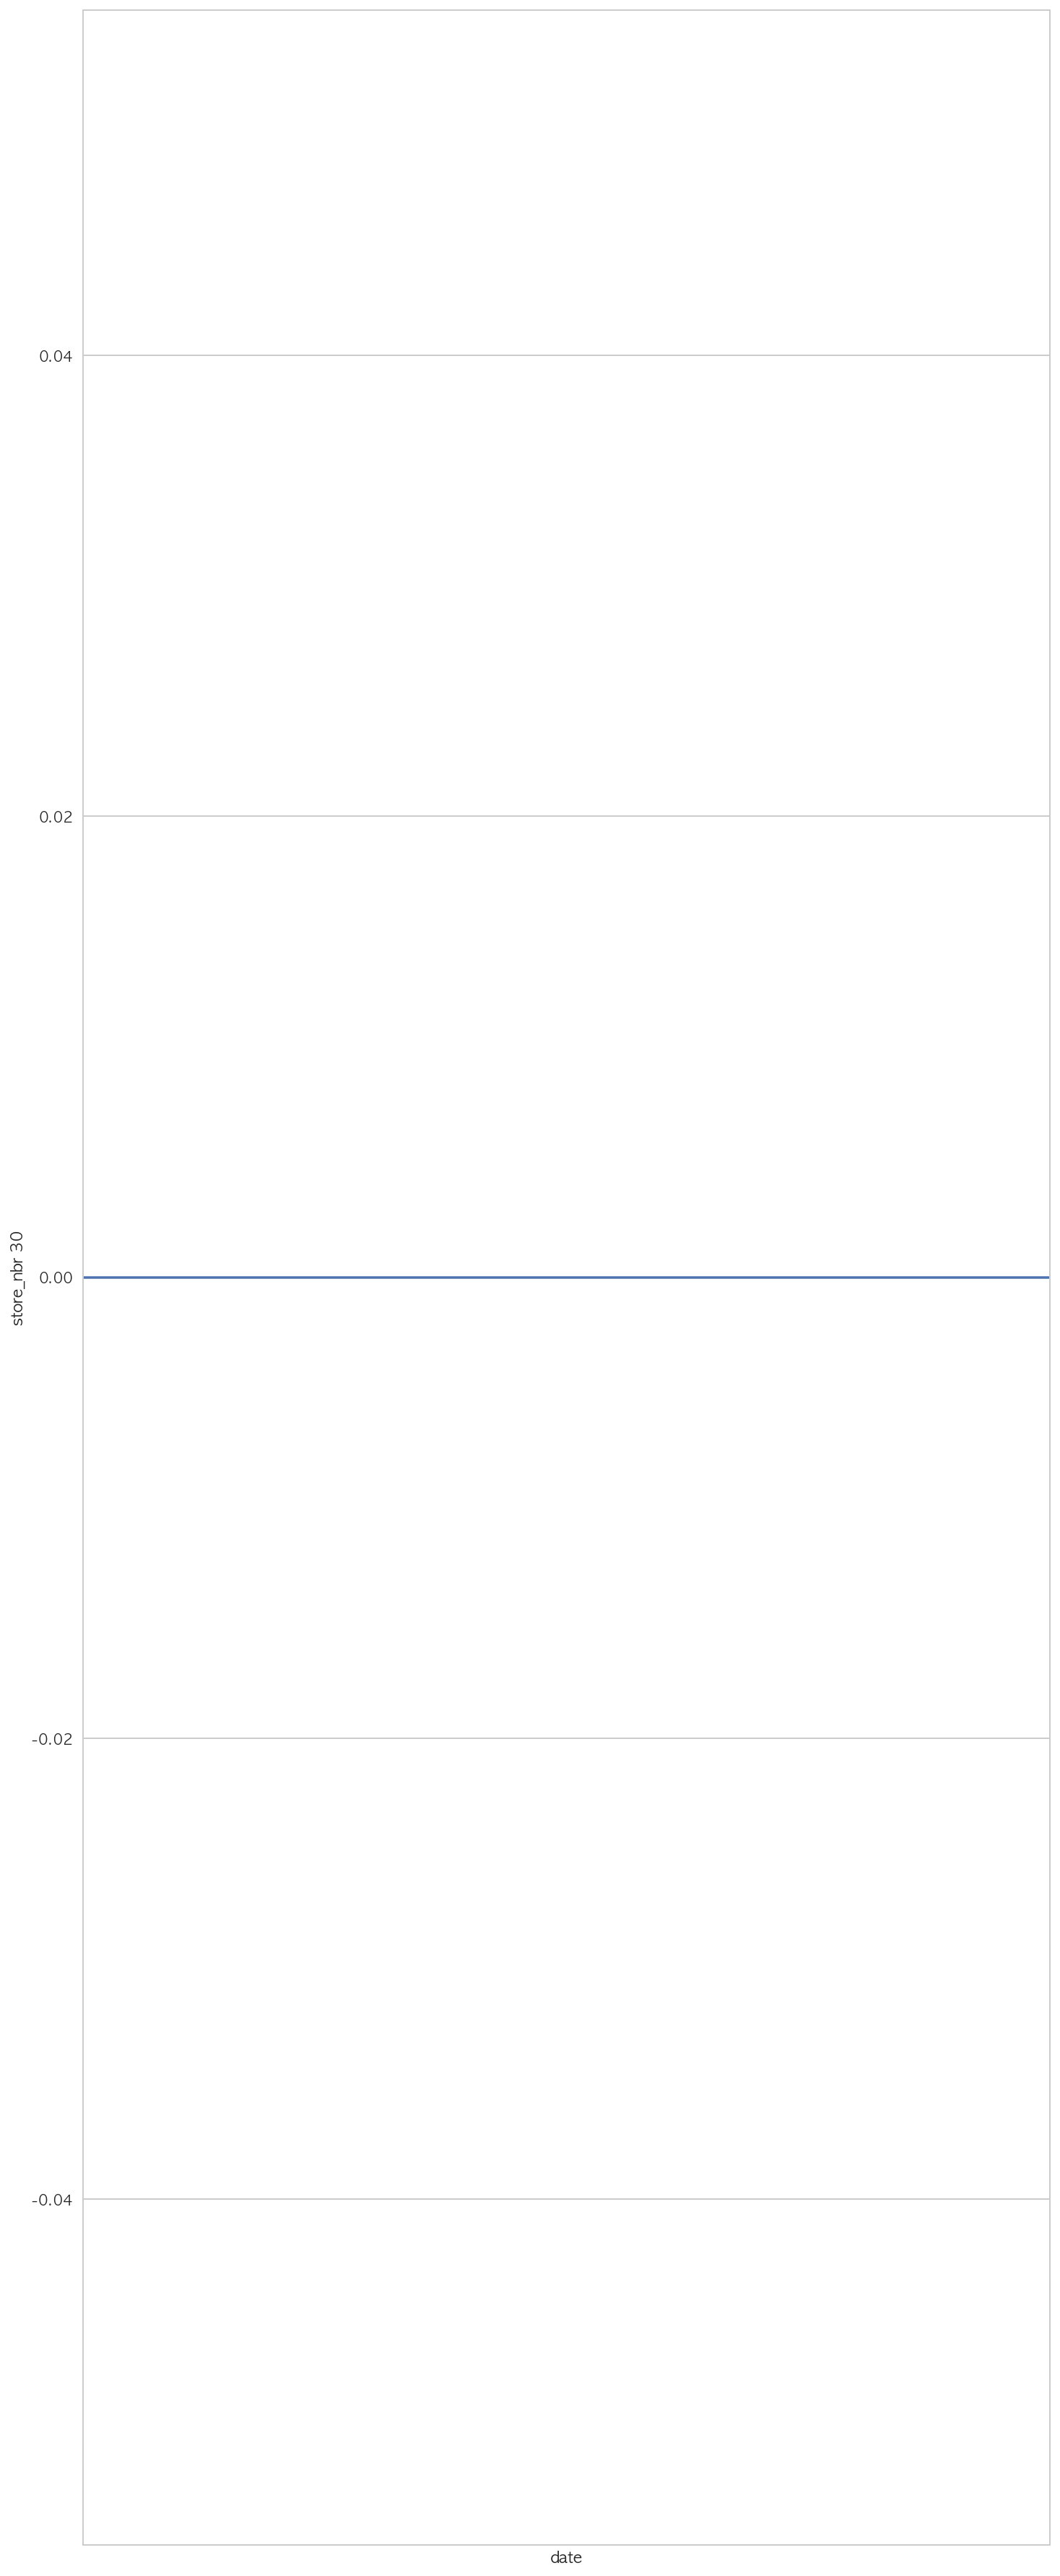

In [26]:
drawDateAndItemUnitsImg(df_test, 1)